In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
dataset = pd.read_json("articles.json")
dataset.head()

,body,title,category
0,Protecting Netflix Viewing Privacy at Scale\r\...,Protecting Netflix Viewing Privacy at Scale,Engineering
1,Introducing Winston — Event driven Diagnostic ...,Introducing Winston - Event driven Diagnostic ...,Engineering
2,Performance & Usage at Instagram\r\n\r\nAt Ins...,Performance & Usage at Instagram,Engineering
3,The simple example of calculating and formatti...,Refactoring a javascript video store,Engineering
4,Billing applications have transactions that ne...,Netflix Billing Migration to AWS - Part III,Engineering


In [3]:
dataset.shape

(2481, 3)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2481 entries, 0 to 2480
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      2481 non-null   object
 1   title     2481 non-null   object
 2   category  2481 non-null   object
dtypes: object(3)
memory usage: 58.3+ KB


In [5]:
dataset["body"][0]

'Protecting Netflix Viewing Privacy at Scale\r\n\r\nOn the Open Connect team at Netflix, we are always working to enhance the hardware and software in the purpose-built Open Connect Appliances (OCAs) that store and serve Netflix video content. As we mentioned in a recent company blog post, since the beginning of the Open Connect program we have significantly increased the efficiency of our OCAs — from delivering 8 Gbps of throughput from a single server in 2012 to over 90 Gbps from a single server in 2016. We contribute to this effort on the software side by optimizing every aspect of the software for our unique use case — in particular, focusing on the open source FreeBSD operating system and the NGINX web server that run on the OCAs.\r\n\r\nMembers of the team will be presenting a technical session on this topic at the Intel Developer Forum (IDF16) in San Francisco this month. This blog introduces some of the work we’ve done.\r\n\r\nAdding TLS to Video Streams\r\n\r\nIn the modern in

In [6]:
dataset['category'].value_counts()

Startups & Business    1071
Product & Design        852
Engineering             558
Name: category, dtype: int64

In [7]:
target_category = dataset['category'].unique()

In [8]:
dataset['categoryId'] = dataset['category'].factorize()[0]
dataset.tail()

,body,title,category,categoryId
2476,"At the Early Stage, Focus on Unit Economic Pro...","At the Early Stage, Focus on Unit Economic Pro...",Startups & Business,1
2477,5 Tips to Nail a Successful Product Launch\n\n...,5 Tips to Nail a Successful Product Launch,Startups & Business,1
2478,Routes to Defensibility for your AI Startup\n\...,Routes to Defensibility for your AI Startup,Engineering,0
2479,Faster. Faster. Faster.\r\n\r\nI’d like to tal...,Faster. Faster. Faster.,Product & Design,2
2480,Netflix is a place where people win. They exce...,Humans Hate Being Spun: How to Practice Radica...,Startups & Business,1


In [9]:
category = dataset[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
category

,category,categoryId
0,Engineering,0
7,Startups & Business,1
57,Product & Design,2


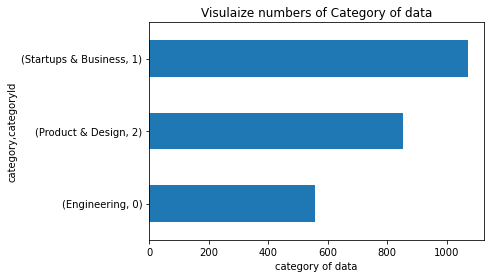

In [10]:
dataset.groupby('category').categoryId.value_counts().plot(kind = "barh")
plt.xlabel("category of data")
plt.title("Visulaize numbers of Category of data")
plt.show()

business related words:


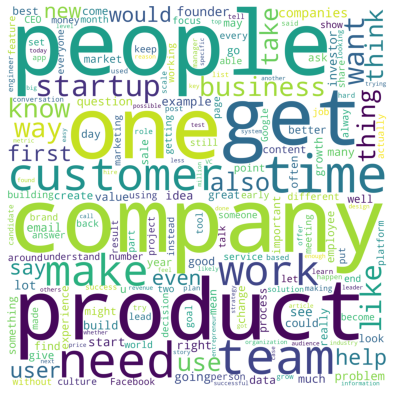

product related words:


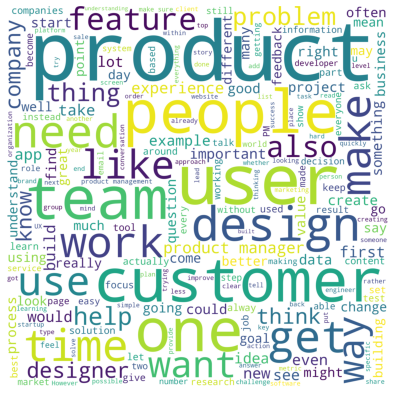

eng related words:


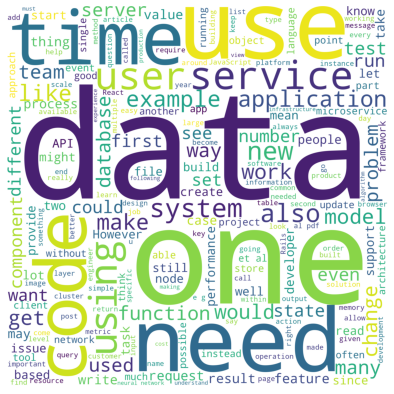

In [11]:
stop = set(stopwords.words('english'))

business = dataset[dataset['categoryId'] == 1]

business = business['body']

product = dataset[dataset['categoryId'] == 2]

product = product['body']

eng = dataset[dataset['categoryId'] == 0]

eng = eng['body']


def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
    #if (word != 'news' and word != 'text')
    ])
    wordcloud = WordCloud(stopwords = stop,
    background_color = color,
    width = 2500, height = 2500).generate(cleaned_word)
    
    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")

wordcloud_draw(business, 'white')

print("product related words:")

wordcloud_draw(product, 'white')

print("eng related words:")

wordcloud_draw(eng, 'white')

In [12]:
body = dataset["body"]
category = dataset['category']

In [13]:
dataset['body'] = dataset['body'].str.lower()

In [14]:
def special_char(body):
  reviews = ''
  for x in body:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews

dataset['body'] = dataset['body'].apply(special_char)
dataset['body'][1]


'introducing winston   event driven diagnostic and remediation platform    netflix is a collection of microservices that all come together to enable the product you have come to love  operating these micro services is also distributed across the owning teams and their engineers  we do not run a central operations team managing these individual services for availability  what we do instead is to invest in tools that help netflix engineers operate their services for high availability and resiliency  today  we are going to talk about one such tool recently built for netflix engineers   winston    problem space    consider a typical mid tier micro service at netflix  it s a single purpose service hosted on aws  it uses jenkins for builds  spinnaker for deployment and atlas for monitoring  alerts are configured on top of metrics using the atlas stack language  atlas supports triggering a set of predefined actions when the alert fires  namely instance level remediation  terminate instance  r

In [15]:
def remove_stopwords(body):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(body)
  return [x for x in words if x not in stop_words]

dataset['body'] = dataset['body'].apply(remove_stopwords)
dataset['body'][1]
#seems like there are special characters, will add a step before this to remove

['introducing',
 'winston',
 'event',
 'driven',
 'diagnostic',
 'remediation',
 'platform',
 'netflix',
 'collection',
 'microservices',
 'come',
 'together',
 'enable',
 'product',
 'come',
 'love',
 'operating',
 'micro',
 'services',
 'also',
 'distributed',
 'across',
 'owning',
 'teams',
 'engineers',
 'run',
 'central',
 'operations',
 'team',
 'managing',
 'individual',
 'services',
 'availability',
 'instead',
 'invest',
 'tools',
 'help',
 'netflix',
 'engineers',
 'operate',
 'services',
 'high',
 'availability',
 'resiliency',
 'today',
 'going',
 'talk',
 'one',
 'tool',
 'recently',
 'built',
 'netflix',
 'engineers',
 'winston',
 'problem',
 'space',
 'consider',
 'typical',
 'mid',
 'tier',
 'micro',
 'service',
 'netflix',
 'single',
 'purpose',
 'service',
 'hosted',
 'aws',
 'uses',
 'jenkins',
 'builds',
 'spinnaker',
 'deployment',
 'atlas',
 'monitoring',
 'alerts',
 'configured',
 'top',
 'metrics',
 'using',
 'atlas',
 'stack',
 'language',
 'atlas',
 'supports'

In [16]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
def lemmatize_word(body):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in body])
dataset['body'] = dataset['body'].apply(lemmatize_word)
dataset['body'][1]


'introducing winston event driven diagnostic remediation platform netflix collection microservices come together enable product come love operating micro service also distributed across owning team engineer run central operation team managing individual service availability instead invest tool help netflix engineer operate service high availability resiliency today going talk one tool recently built netflix engineer winston problem space consider typical mid tier micro service netflix single purpose service hosted aws us jenkins build spinnaker deployment atlas monitoring alert configured top metric using atlas stack language atlas support triggering set predefined action alert fire namely instance level remediation terminate instance reboot remove service discovery etc escalation email page publish sqs integration action beyond small set already supported first class citizen within atlas framework reduce complexity manage resiliency atlas let call custom step diagnostics remediation r

In [18]:
dataset.tail()

,body,title,category,categoryId
2476,early stage focus unit economic profitability ...,"At the Early Stage, Focus on Unit Economic Pro...",Startups & Business,1
2477,5 tip nail successful product launch past two ...,5 Tips to Nail a Successful Product Launch,Startups & Business,1
2478,route defensibility ai startup simple framewor...,Routes to Defensibility for your AI Startup,Engineering,0
2479,faster faster faster like talk fast left build...,Faster. Faster. Faster.,Product & Design,2
2480,netflix place people win exceed expectation co...,Humans Hate Being Spun: How to Practice Radica...,Startups & Business,1


In [19]:
x = dataset['body']
y = dataset['categoryId']


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(dataset.iloc[:,0].values)
y = np.array(dataset.categoryId.values)
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(dataset.body).toarray()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


X.shape =  (2481, 5000)
y.shape =  (2481,)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))


1736
745


In [22]:
#create list of model and accuracy dicts
perform_list = [ ]

In [23]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))


In [24]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

c:\Python\Projects\envs\egyfwd\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy Score of Basic Logistic Regression: % 82.28
Precision : 0.8228187919463087
Recall    : 0.8228187919463087
F1-score   : 0.8228187919463086


c:\Python\Projects\envs\egyfwd\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 84.83
Precision : 0.8483221476510067
Recall    : 0.8483221476510067
F1-score   : 0.8483221476510067


In [26]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 82.15
Precision : 0.8214765100671141
Recall    : 0.8214765100671141
F1-score   : 0.8214765100671141


In [27]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 81.74
Precision : 0.8174496644295302
Recall    : 0.8174496644295302
F1-score   : 0.8174496644295302


In [28]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 66.17
Precision : 0.661744966442953
Recall    : 0.661744966442953
F1-score   : 0.661744966442953


In [29]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.29
Precision : 0.7328859060402685
Recall    : 0.7328859060402685
F1-score   : 0.7328859060402684


In [30]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)


Test Accuracy Score of Basic Gaussian Naive Bayes: % 67.92
Precision : 0.6791946308724832
Recall    : 0.6791946308724832
F1-score   : 0.6791946308724832


In [31]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,82.28,0.82,0.82,0.82
1,Random Forest,84.83,0.85,0.85,0.85
2,Multinomial Naive Bayes,82.15,0.82,0.82,0.82
3,Support Vector Classifer,81.74,0.82,0.82,0.82
4,Decision Tree Classifier,66.17,0.66,0.66,0.66
5,K Nearest Neighbour,73.29,0.73,0.73,0.73
6,Gaussian Naive Bayes,67.92,0.68,0.68,0.68


In [32]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from Random Forest")

The best accuracy of model is 84.83 from Random Forest


In [33]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("accuracy of our model is:",score)
print(classification_report(y_pred, y_test, target_names=target_category))

accuracy of our model is: 0.8134228187919463
                     precision    recall  f1-score   support

        Engineering       0.87      0.88      0.87       171
Startups & Business       0.83      0.79      0.81       333
   Product & Design       0.75      0.80      0.77       241

           accuracy                           0.81       745
          macro avg       0.82      0.82      0.82       745
       weighted avg       0.82      0.81      0.81       745



c:\Python\Projects\envs\egyfwd\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
gnb,mnb,bnb = GaussianNB(),MultinomialNB(alpha=1.0,fit_prior=True),BernoulliNB(alpha=1.0,fit_prior=True)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

BernoulliNB()

In [35]:
ypg = gnb.predict(x_test)
ypm = mnb.predict(x_test)
ypb = bnb.predict(x_test)

print("Gaussian = ",accuracy_score(y_test,ypg))
print("Multinomial = ",accuracy_score(y_test,ypm))
print("Bernoulli = ",accuracy_score(y_test,ypb))

print(classification_report(ypm, y_test, target_names=target_category))

Gaussian =  0.7194630872483222
Multinomial =  0.8536912751677852
Bernoulli =  0.7476510067114094
                     precision    recall  f1-score   support

        Engineering       0.93      0.94      0.93       171
Startups & Business       0.84      0.85      0.84       312
   Product & Design       0.82      0.81      0.82       262

           accuracy                           0.85       745
          macro avg       0.86      0.86      0.86       745
       weighted avg       0.85      0.85      0.85       745



In [36]:
svc = SVC()
svc.fit(x_train,y_train)
y_pred1 = svc.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_pred1, y_test, target_names=target_category))

0.8053691275167785
                     precision    recall  f1-score   support

        Engineering       0.82      0.91      0.86       155
Startups & Business       0.87      0.74      0.80       367
   Product & Design       0.72      0.83      0.77       223

           accuracy                           0.81       745
          macro avg       0.80      0.83      0.81       745
       weighted avg       0.81      0.81      0.81       745



In [37]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_pred2 = classifier.predict(x_test)
print(accuracy_score(y_test , y_pred2))
print(classification_report(y_pred2, y_test, target_names=target_category))

0.7194630872483222
                     precision    recall  f1-score   support

        Engineering       0.76      0.77      0.76       168
Startups & Business       0.73      0.70      0.71       326
   Product & Design       0.69      0.71      0.70       251

           accuracy                           0.72       745
          macro avg       0.72      0.73      0.72       745
       weighted avg       0.72      0.72      0.72       745



In [38]:
forest = RandomForestClassifier(n_estimators=10 ,criterion='entropy' , random_state=0)
forest.fit(x_train,y_train)
y_pred3 = forest.predict(x_test)

print(accuracy_score(y_test , y_pred3))
print(classification_report(y_pred3, y_test, target_names=target_category))

0.7597315436241611
                     precision    recall  f1-score   support

        Engineering       0.83      0.89      0.86       161
Startups & Business       0.80      0.72      0.76       352
   Product & Design       0.66      0.73      0.69       232

           accuracy                           0.76       745
          macro avg       0.76      0.78      0.77       745
       weighted avg       0.76      0.76      0.76       745



In [39]:
neighbor = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 3)
neighbor.fit(x_train,y_train)
y_pred4 = neighbor.predict(x_test)
print(accuracy_score(y_test , y_pred4))
print(classification_report(y_pred4, y_test, target_names=target_category))

0.7395973154362416
                     precision    recall  f1-score   support

        Engineering       0.69      0.89      0.77       133
Startups & Business       0.81      0.70      0.75       364
   Product & Design       0.69      0.72      0.70       248

           accuracy                           0.74       745
          macro avg       0.73      0.77      0.74       745
       weighted avg       0.75      0.74      0.74       745

